# LUNG CANCER DETECTION 

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy,categorical_crossentropy, top_k_categorical_accuracy
from keras import backend as k
from keras.layers.convolutional import*
import os
import tensorflow as tf
import random as rn
from matplotlib import pyplot as plt
import itertools
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
%matplotlib inline
import json

Using TensorFlow backend.


In [2]:
tf.keras.backend.clear_session()

In [3]:
#CREATING VARIABLES AND ASSIGNING PATH
train_path='D:/Sahana/New_Segment/train'
valid_path='D:/Sahana/New_Segment/valid'
test_path='D:/Sahana/New_Segment/test'

In [4]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['0','1'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['000','111'],batch_size=5)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['11'],batch_size=1)

Found 1082 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 1 images belonging to 1 classes.


In [5]:
#FUNCTION TO DISPLAY THE IMAGES
#plot image with labels
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims) %2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],cmap="CMRmap",interpolation=None if interp else 'none')

In [6]:
imgs,labels=next(train_batches)

FEW IMAGES OF TRAINING DATASET


C:\Users\Sandhya R K\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


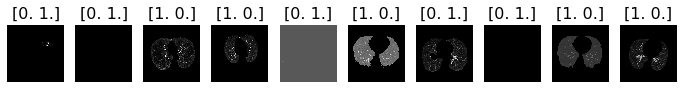

In [7]:
#we call the function plot to display images
print("FEW IMAGES OF TRAINING DATASET")
plots(imgs, titles=labels)

FEW IMAGES OF VALID DATASET


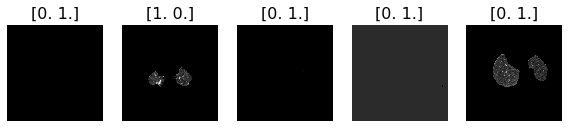

In [8]:
imgs1,labels1=next(valid_batches)
print("FEW IMAGES OF VALID DATASET")
plots(imgs1, titles=labels1)

In [9]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


In [10]:
time_callback = TimeHistory()

In [11]:
import json
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [12]:
from keras.applications.resnet50 import ResNet50
input_shape = (224,224,3)

In [13]:
from tensorflow.keras import layers 

In [14]:
model = ResNet50(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)

In [15]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [19]:
model.compile(Adam(lr=.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=2,
                                  verbose=1,factor=0.2)

filepath="Resnet50_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history= model.fit(train_batches, steps_per_epoch=108,
                              validation_data=valid_batches,validation_steps=44,epochs=20,verbose=1,
                              callbacks=[learn_control, checkpoint,time_callback]
)

Epoch 1/20
108/108 [==============================] - 74s 688ms/step - loss: 0.5829 - accuracy: 0.7435 - val_loss: 0.3169 - val_accuracy: 0.8028

Epoch 00001: val_accuracy improved from -inf to 0.80275, saving model to Resnet50_weights_best.hdf5
Epoch 2/20
108/108 [==============================] - 62s 577ms/step - loss: 0.4565 - accuracy: 0.7929 - val_loss: 1.0521 - val_accuracy: 0.6743

Epoch 00002: val_accuracy did not improve from 0.80275
Epoch 3/20
108/108 [==============================] - 63s 580ms/step - loss: 0.3468 - accuracy: 0.8519 - val_loss: 2.9736 - val_accuracy: 0.6560

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00003: val_accuracy did not improve from 0.80275
Epoch 4/20
108/108 [==============================] - 62s 577ms/step - loss: 0.2612 - accuracy: 0.8974 - val_loss: 0.2974 - val_accuracy: 0.9266

Epoch 00004: val_accuracy improved from 0.80275 to 0.92661, saving model to Resnet50_weights_best.hdf5
Epoch 5/20
108/108 [=

In [21]:
sum(time_callback.times)

1201.3495781421661

In [22]:
import pandas as pd

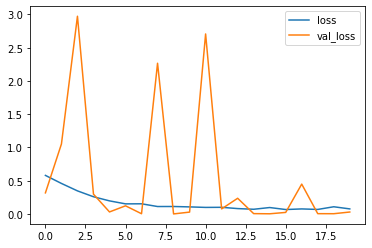

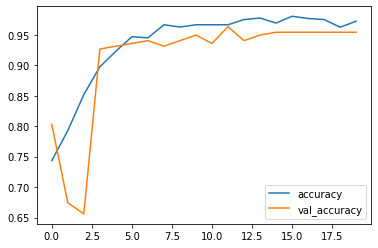

In [23]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()


In [24]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

109/109 [==============================] - 12s 111ms/step
Training set of Images
loss, accuracy [0.0006413614028133452, 0.9787430763244629]


1/1 [==============================] - 1s 1s/step


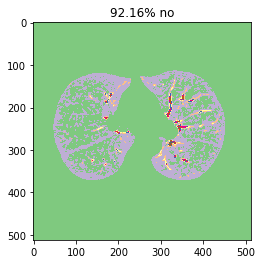

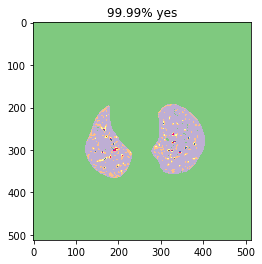

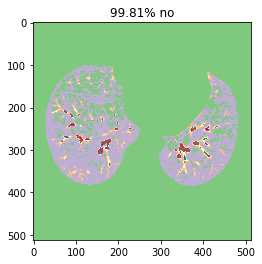

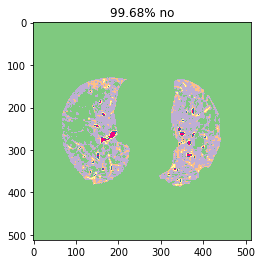

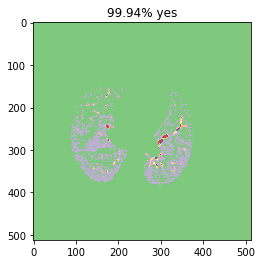

In [27]:
import matplotlib.image as mpimg
# Predicting

probabilities = model.predict_generator(valid_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = valid_path + "/" +valid_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img,cmap="Accent")
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

# LOADING AND TESTING MODEL

In [5]:
from tensorflow.keras.models import load_model

In [6]:
model=load_model('Resnet50_weights_best.hdf5')

In [11]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['000'],batch_size=1)

Found 1 images belonging to 1 classes.


1/1 [==============================] - 0s 41ms/step


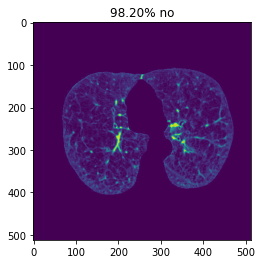

In [12]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict_generator(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

In [9]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['1'],batch_size=1)

Found 1 images belonging to 1 classes.


1/1 [==============================] - 0s 13ms/step


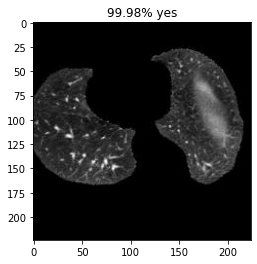

In [10]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

In [13]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

  ...
    to  
  ['...']
109/109 [==============================] - 13s 117ms/step - loss: 0.1360 - accuracy: 0.9732
Training set of Images
loss, accuracy [0.13603879971891095, 0.97319776]


In [14]:
results1 = model.evaluate(valid_batches)
print("Training set of Images")
print('loss, accuracy', results1)

  ...
    to  
  ['...']
44/44 [==============================] - 5s 106ms/step - loss: 0.1093 - accuracy: 0.9633
Training set of Images
loss, accuracy [0.10929739058073293, 0.96330273]
